# Implementation and evaluation of K-nearest neighbors (KNN) algorithm for handwritten digit recognition
### Data Analysis MoBi SoSe2022, Topic 01: Biomedical Image Analysis
### Tutor: Marie Becker
### Team 02: Lena Fleischhacker, Pia Röhrich, Hellen Röttgen, Benjamin Wehnert
#### July 2022

# Abstract
Digit recognition can be implemented using many different classification methods. The k-nearest neighbors (KNN) algorithm is well-known for its simplicity, however, it quickly reaches limitations when it comes to flexibility.

The main goal of the project was to write an algorithm that accurately recognizes handwritten digits from the MNIST dataset using the KNN method. Prior to the implementation of KNN, the data was z-transformed and dimensionality was reduced through Principal Component Analysis (PCA). 

In addition to digit recognition using PCA and KNN, average numbers were generated from the MNIST data set and used for digit recognition as well. Furthermore, the PCA was implemented using singular value decomposition (SVD) instead of eigenvector decomposition. Finally, the digit recognition algorithm was expanded for the recognition of self-written digits.

The KNN algorithm with previous PCA proved to be an accurate but inefficient digit recognition algorithm. It can also be used for the accurate recognition of self-written digits. However, the digit recognition based on just the average images proved to be surprisingly accurate despite its simplicity.

# Table of contents

1. Introduction
2. Imports
3. Material
4. Methods <br>
    i. Z-tranformation <br>
    ii. Principal component analysis <br>
    iii. k-nearest neighbors <br>
    iv. Finding optimal k and number of PC's <br>
    v. Expanded code <br>
        a. average numbers
        b. PCA with SVD
        c. Self-written digit recognition
5. Results
    i. Z-tranformation <br>
    ii. Principal component analysis <br>
    iii. Finding optimal k and number of PC's <br>
    iv. k-nearest neighbors<br>
    v. Expanded code <br>
        a. average numbers
        b. PCA with SVD
        c. Self-written digit recognition
6. Discussion
7. Bibliography



# Introduction
Digit recognition is a form of pattern recognition which describes the operation of identifying digits from images. With handwritten numbers, this is not an easy task, as they always look slightly different. With almost all processes in everyday life being digitalized, e.g. banking transactions or contact forms, developing such algorithms has become extremely useful and almost inevitable.

For this reason, the MNIST data set has been well studied and analyzed over the past decades, leading to the development of algorithms that possess an error rate lower than 1%. (Baldominos et al., 2019) The exhaustive analysis of the MNIST data set laid the foundation for the development of more advanced pattern recognition algorithms such as the detection of house numbers from photos with the Street View house numbers (SVHN) dataset (Netzer et al., 2011) or the recognition of letters in addition to numbers from the Extended MNIST (EMNIST) data set. These algorithms can be very helpful for future applications like better navigation systems.

KNN (k-nearest neighbors) is a machine learning algorithm that can be used for pattern recognition. It assigns a data point to the class that most of its k-nearest neighbors belong to (Govindaraju et al., 2000). This method has been improved over the past years, for example leading to the development of so-called Deep KNN algorithms (Lecet al. 2021).

However, to properly understand the fundmentals of machine learning, it is useful to reproduce the basic steps of digit recognition using the MNIST data set and the KNN algorithm. This was done in the first part of the project. First, the data was z-transformed for homogeneity. Secondly, a PCA was implemented to minimize the needed computing power by reducing dimensionality. Consequently, the PCA-transformed data was used for digit recognition based on the KNN method. The final step was finding the optimal number of ks and PCs.

In the second part of the project, the algorithm was expanded and applied differently. These expansions include a digit recognition based on average numbers, a PCA using singular value decomposition instead of eigenvector decomposition and the recognition of self-written digits instead of those from the test data set.

# Imports
For the algorithm and the visualization of the results, several functions from the packages numpy, pandas, seaborn and matplotlib were used. For more clarity, self-written functions are stored in a folder containing several python scripts and are therefore accessed through modules as well.

The MNIST training and test data need to be imported too. The same applies to the saved z-array, the dimensionality-reduced data array and the average digits so that these do not need to be computed every time the algorithms run.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import Functions.PCA as pca
import Functions.data_load as dat
import Functions.visualization as vis
import Functions.average_img as avg
import Functions.k_nearest as knn

train_array, test_array = dat.load_data()
cleaned_arr = dat.clean_train_arr()
z_arr = pca.z_arr(cleaned_arr)
reduced_arr = pca.arr_only(z_arr, pca.create_sorted_eigenvec(30))
val_arr = dat.load_val_arr()
precise_val_arr = dat.load_precise_val_arr()

# Material
The data set that was used for the project is the standardized MNIST data set. MNIST stands for "Modified National Institute of Standard and Technology database". It consists of 70000 images which are divided into a training data set comprising 60000 images and a test data set comprising 10000 images. Each image shows a handwritten digit ranging from zero to nine. The digits were written in the United States by office emloyees and high school students.

The images are stored as grayscaled comma-seperated values (csv) files. Each image consists of 28 x 28 = 784 pixels with intensity values ranging from 0 to 255. This means that all training images can be displayed in a 60000 x 785 array (training array) with the first column giving the number visible in the image. Consequently, the test images can be dispalyed as a 10000 x 785 array (test array).

The digit recognition algorithms are based on the training array only. Otherwise, the accuracy of the algorithm would be adulterated because it is fitted to the test data.

Example images from the training array and test array are displayed in the following:

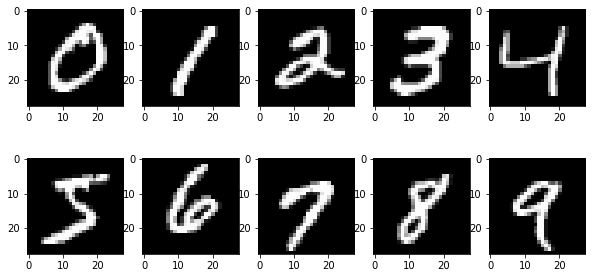

In [2]:
vis.ten_digits(train_array)

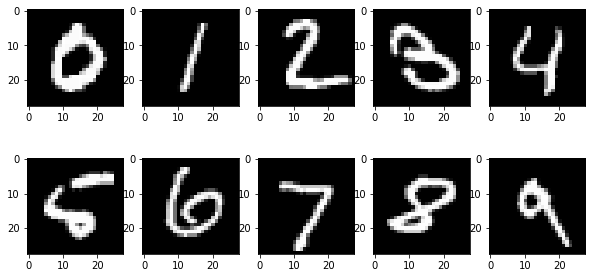

In [3]:
vis.ten_digits(test_array)

# Methods

## Z-Transformation (PCA preparation)
Using the z-transformation, values of a sample are centered and scaled. The distribution of these normalized values has a mean of 0 and a standard deviation of 1. This makes the sample comparable by making the data non-dimensional. The calculations are done as follows:

$$ Z = \frac{\left(X_i-\bar{X}\right)}{\sigma_{x}} $$

Applied to the project, this means that the average intensity and standard deviation for each pixel needed to be calculated. After that, the intensity values for each pixel in each of the images were z-transformed. There are brightness differences between the images that are not visible when displaying the images because the imshow function adjusts the intensity scale. However, the intensity values of all images need to be brought in line to make them comparable. Converting the data into a z-array, which is hence used instead of the original array, is a necessary step for the ensuing PCA. 

Some pixels, such as those in the corners, have an intensity of zero in all images. Following from this, the mean and thus the standard deviation are zero as well. Because a division by zero is not possible, these pixels can not be z-transformed. Therefor, a cleaned data set (cleaned_train_array) was created in which all colums containing zeroes only are deleted. Of course, the same columns are also deleted from the images inputed for classification into to the algorithm later. The cleaned training array can be accessed using the function clean_train_arr. 

The algorithm for the z-transformation of the training array can be accessed through the self-written function z_arr. The function z_transformation additionally z-tranforms an image using the means and standard deviation of the training data. For shorter run times, the z-transformed array was stored and can be accessed through the function load_z_arr_train.

## Principal Component Analysis (PCA)
PCA is used for dimensionality reduction and therefor implemented ahead of KNN. KNN is a lazy learning algorithm, meaning that instead of learning from the training data, the algorithm simply compares input with the training data each time it runs. Consequently, a dimension reduction shortens the run time. PCA is a method commonly used in data science and pattern recognition with many sources available that can be used for reference (Anowar et al., 2021).

Despite losing dimensions, hardly any information should be lost. Therefore, the first step of a PCA is to identify the correlation between different features of the dataset and putting those values into a correlation matrix. This is done by using the Pearson correlation which is calculated as follows:

$$ Corr(x,y) = \frac{1}{{N-1}}\sum_{i=1}^N\frac{(x_i-\overline{x})}{s_x}\frac{(y_i-\overline{y})}{s_y}\ $$

After this step, the eigenvectors v and eigenvalues λ of the covariance matrix A are calculated. The relationship between a matrix, eigenvectors and eigenvalues is expressed in the following equation:

$$ Av_i=λ_iv_i $$

If calculated by hand, the eigenvalues need to be calculated in order to find the eigenvectors. The eigenvalues are the diagonal entries of a matrix S which can be found through diagonalisation of A, satisfying the following equation:

$$ S=\frac{1}{N-1}\, (X_{CS}V)'\, (X_{CS}V) $$

Spatially, the diagonalization describes a rotation of the correlation matrix. This allows to look at the data points from a different angle, defining new axes/features called principal components. These are inserted into a new matrix and sorted according to their corresponding eigenvalues. The higher the eigenvalue, the higher the amount of variance covered. 

From eigenvalue matrix, a certain number k of principal components is chosen, a step that is further explained under finding the optimal k and number of PC's.

The last step of a PCA is the transformation of the original data matrix by computing the dot product of A with a matrix made up of the top k eigenvectors, resulting in the transformed data matrix. The transformed matrix has reduced number of dimensions depending on the number of PCs chosen.

In summary, the principal components allow to reduce dimensions and run time by leaving out highly correlated features.

In the project, these steps were implemented using a self-written PCA function. In this case, the features are the intensity values. The algorithm follows the steps mentioned above mainly using numpy functions. However, instead of calculating the Pearson Correlation in the first step, just the covariance is calculated as the division by the standard deviation becomes unnecessary due to the the previous z-transformation.


## K-nearest neighbors (KNN)
After the PCA, the KNN algorithm is applied. KNN stands for k-nearest neighbors and is a non-parametric, lazy and supervised learning algorithm. This means that it does not assume a specific model structure but rather determines the model structure from the data. Additionally, there is no real learning phase since all of the training data is stored and used as representation for the testing phase. Thus, the algorithm makes Just-In-Time predictions. 

The application of KNN aims at being able to classify a new sample point by looking at its k nearest neighbors, meaning data points with similar characterisics from a training data set. 

The algorithm can be used for either classification or regression. Most commonly, it is used for classification which determines the class membership of the new sample point by majority vote. This means that it is assigned the class that is most common among its k nearest neighbors. If used for regression, the value of an object is determinded by either taking the mean or the median of the values of its k nearest neighbors. 

When wanting to apply KNN one has to first choose a specific k. This determines the amount of nearest neighbors that will be considered to classify the new data point. Then, the distances between the new sample point and every data point from the training dataset has to be calculated. This can be done using the Euclidean Distance: 

$$ d\left( p,q\right)   = \sqrt {\sum _{i=1}^{n}  \left( q_{i}-p_{i}\right)^2 } $$

Subsequently, the k closest entries are selected and the classification is determined by majority vote. Therefore, the new sample point is assigned the label occuring most frequently among its k nearest neighbors. 

The project aimed at correctly recognizing and labeling a handwritten digit by comparing its similarity to previously labeled digits from the training dataset. This means that the each inputed sample image from the test dataset was compared with all 60 000 images in the training dataset. In this case, the sample image's nearest neighbors are images with the smallest difference in intensity values. 

To implement KNN for digit recognition the kNN function was used. It is important to state that one has to define whether the the input image belongs to the test or training dataset first. If the sample is part of the training dataset the nearest nieghbor has to be ignored. This gets further explained in the methods when talking about finding the optimal k. 

The kNN function carries out the following steps: 

1. Calculating the Euclidean Distance between the PCs of the sample image and the PCs of all 60 000 images in the training dataset. All distances are saved in a list.<br>
2. A list including the indices of the k nearest images is created and sorted in ascending order with regards to the intensity differences. <br>
3. A counter is generated to identify which digit appears most among the k nearest neighbors. <br>
4. The digit occuring most frequently is returned as the classification prediction of the sample image. <br>

To validate the KNN algorithm the validation_kNN_train function was used. This function runs the KNN code for a set amount of images and returns the accurracy of the prediction. To consider that the first half of the digits in the dataset is written by adults and the second half is written by children, the images selected for the validation process were chosen to include an equal amount of both types. 

## Finding optimal k and number of PC's
Finding the optimal k and number of PCs was implemented simultaneously in several accuracy analyses after the algorithms for the PCA and the KNN were written. This was done by repeatedly running the code with different ks and PCs. For this, the validation_kNN_train function was used. The optimal k and number of PCs was decided based on the highest accuracy.

Especially the selection of k heavily influences what label the inputted sample point is assigned. Since only the training data set is used, a problem arises because if the input image itself is part of the training dataset, its nearest neighbor will always be itself. Thus, the boundaries would be overfitted and k=1 would consistently be identified as the ideal k. To solve this issue, the nearest neighbor is removed from the calculations, assuring an unbiased prediction. The overfitting problem has been considered in the kNN function. If the input image originates from the training dataset the nearest neighbor is excluded from the calculations.

To determine the optimal k and number of PCs for the project, the accuracy of the algorithm was first tested for 1-40 PCs and 1-10 ks with 1000 samples from the training array for each combination.

Second, a more refined analysis was implemented for 27-35 PCs and 3-5 ks using 10000 samples from the training array.

## Expanded code

### Average images
To get a first impression of how related the images in the data set are, an algorithm calculating average digits was implemented. The according steps were saved in the avg_digit_img function. 

The calculation is done by 
 1. Choosing all images from the training data set displaying one same number
 2. Summing up the intensity values for each pixel of these images
 3. Dividing the intensity sums by the number of images used

In the next step, the average images were used for digit recognition in a function called mean_pred. This is done by subtracting the intensity values of each average digit from the inputted image. The algorithm identifies the image as the digit with the lowest intensity difference. The average images are stored so that they do not need to be computed all over again each time the algorithm runs.

The digit recognition using average images was further developed by weighting certain pixels more with the function mean_pred_weighted. The weighting is done based on the variance covered by each pixel. This means that the intensity differences of every pixel are summed up over all images in the train array. The sum is then divided by the summed up intensity differences of all pixels to receive the percentage of the global variance. The weightings are then multiplied with the intensity differences calculated between the inputted image and all average images, which gives high-variance pixels a higher weight.

### PCA with singular value decomposition (SVD)
Instead of using the eigenvector decomposition of the correlation matrix to calculate the principal components, singular value decomposition (SVD) can be applied. The main difference between the two decomposition methods is that the matrices do not need to be square matrices for SVD. All matrices satisfy the following equation:

$$ M = USV^{T} $$

The columns of the matrix S are used as the principal components. The corresponding function is called PCA_SVD. It identifies the principal components as explained and computes the dot product of the data matrix with the top k eigenvectors. The steps are implemented as explained in the review by Anowar F., Sadaoui S. and Selim B. (2021).


### Self-written digit recognition
In addition to using the PCA und KNN algorithm to recognize numbers from the MNIST data set, it is used to recognize digits self-written digits. These images need to be imported in square format. The function is labeled load_jpg. It comprises the following steps:

1. importing a jpeg image of the handwritten digit into the notebook using functions from the pillow package.
2. reformatting the image to make it comparable with training images from MNISt data set <br>
    i.  conversion to grayscale <br>
    ii.  converting the jpeg into a numpy array <br>
    iii.  deleting rows and columns so that tha overall number of pixels is divisible by 28 <br>
    iv. reducing the number of pixels in the image to 784 by averaging squares of pixels and creating a 28x28 image from the means <br>
3. applying z-transformation, PCA and KNN algorithms to image


# Results


## Results Z-Transformation
After the z-transformation, the digits look different from the original ones as can be seen in the following example:

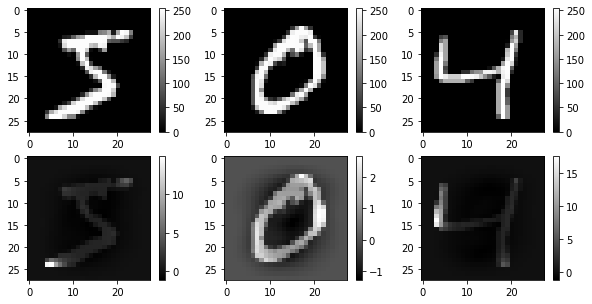

In [4]:
vis.digits_after_z(train_array)

## Results PCA
Before the implementation of the PCA, the intensity values of the pixels showed correlation to each other as displayed in the following plot. The x- and y-axis show the different pixels and the color describes how high the correlation between the intensity values is. Yellow stands for a correlation of 1 and dark blue for a correlation of 0. 

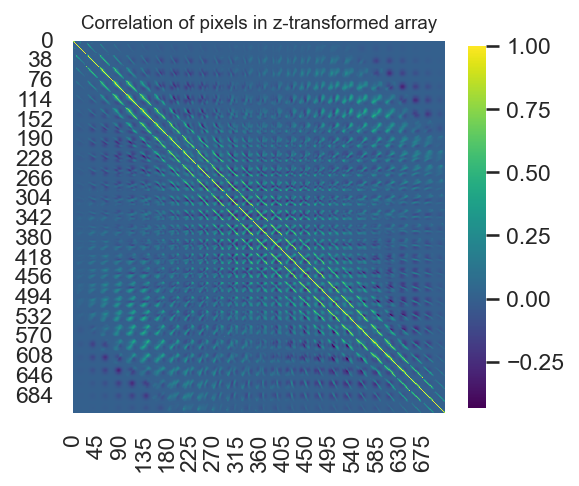

In [5]:
vis.correlation_heatmap(z_arr, 'pixels in z-transformed array')

The PCA allowed to minimize correlation between the features. This can be seen in the following graph. The x- and the y-axis show the 29 PCs and the color indicates the correlation. Yellow stands for a correlation of 1 and dark blue stands for a correlation of 0. The correlation for all PCs is almost 0 except for the correlation of each PC with itself, which is one. 

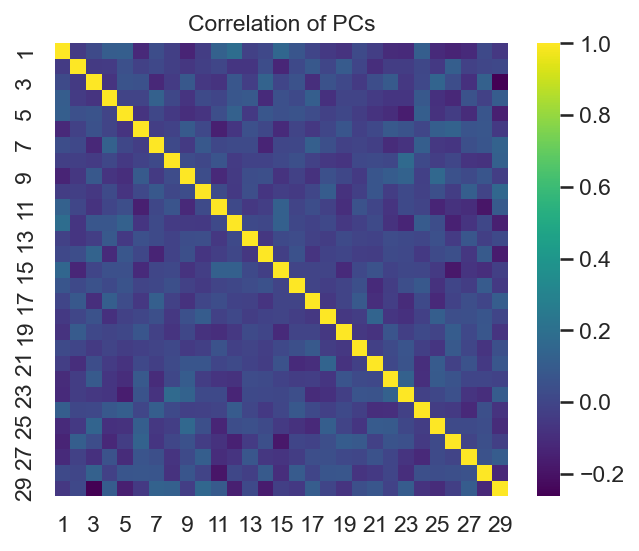

In [6]:
vis.correlation_PC()

The PCA clusters data so that similar data points can be found in physical proximity to each other even with only a few dimensions. This can already be seen if the data is displayed in a two-dimensional coordinate system. The first principal component is displayed on the x-axis and the second principal component on the y-axis. The dots represent PCA-tranformed data points from the training array and the color indicates the digit shown on the corresponding image.

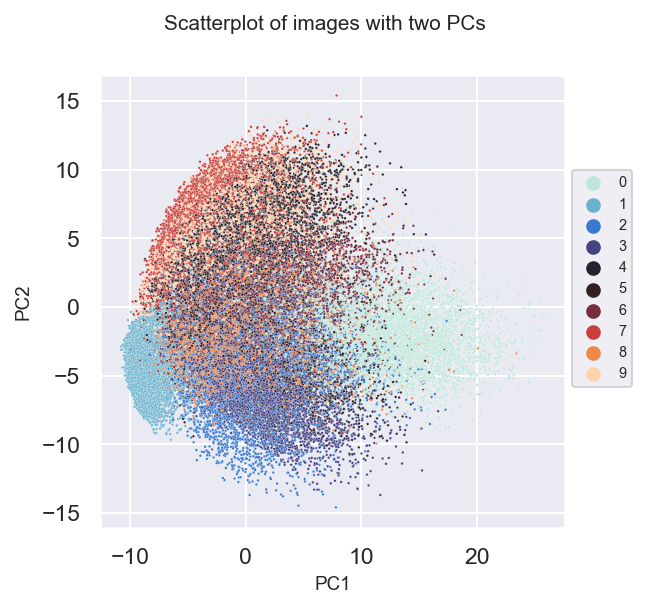

In [7]:
vis.principal_comp_2d(reduced_arr, train_array[:,0], i=1, j=2)

## Results Finding optimal k and number of PC's
The results of the first analysis with 1-40 PCs and 1-10ks with 1000 samples for each combination are shown in the heatmap below. The x-axis shows the number of ks and the y-axis shows the number of PCs. Yellow stands for an accuracy near 99% and dark blue for an accuracy of 0%. The analysis had a run time of about 7 hours.

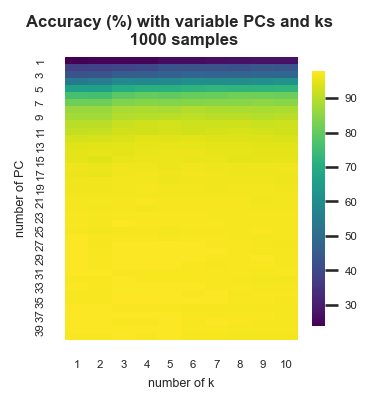

In [8]:
vis.heatmap_k_PC(val_arr, range(1, 41), range(1, 11))

The following heatmap is a closeup of the heatmap above. It shows k 1-10 on the x-axis and PCs 21-40 on the y-axis. Again, yellow represents the highest accuracy near 98% and dark blue the lowest accuracy, however this time the lowest accuracy displayed is around 96%. It can be drawn from this that the accuracy is highest for 27-35Pcs and 3-5ks.

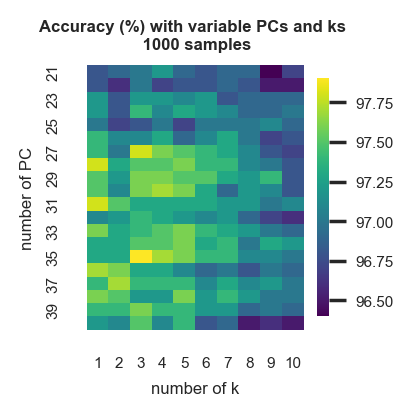

In [9]:
vis.heatmap_k_PC(val_arr[20:40, :], range(21, 41), range(1, 11), large=False, medium=True)

The second accuracy analysis was implemented for the PCs 27-35 and ks 3-5 to substantiate the results from the first analysis. The results of the second analysis are shown in the following heatmap. The ks are shown on the x-axis and the PCs are shown on the y-axis. Yellow stands for an accuracy of 97.6% and dark blue for an accuracy of 97.3%. The plot shows that the most accurate combination of k and PCs is k=3 and 29 PCs. The run time for this analysis was slightly longer than three hours.

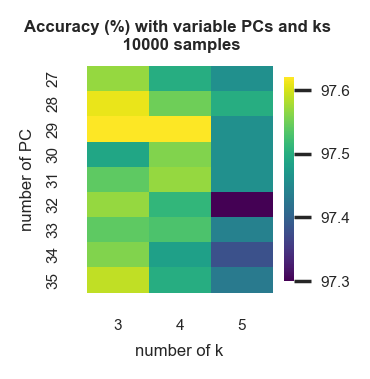

In [10]:
vis.heatmap_k_PC(precise_val_arr, range(27, 36), range(3,6), large=False, small=True)

Each principal component covers a certain amount of the total variance. The connection between the number of principal components and the amount of variance covered is displayed in the following plot. The x-axis gives the principal components while the y-axis gives the obtained variance. The red marking labels the point on the graph that shows that 29 PC's cover around 70% of the total variance.

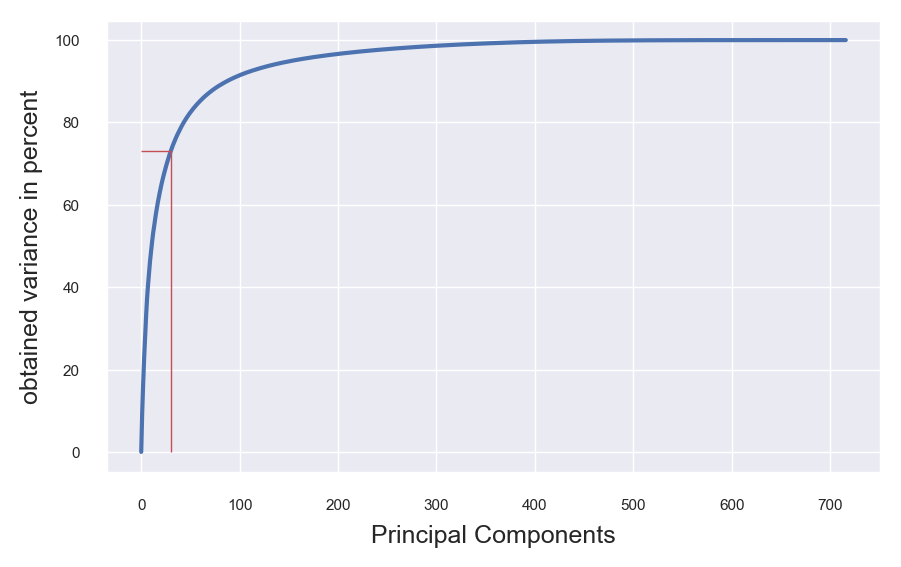

In [11]:
vis.PC_variance()

## Results KNN
The KNN function recognizes digits with an accuracy of 97.6% as calculated by the validation function below after running for the whole test array.

In [12]:
knn.validation_kNN(s_size=10)

Accuracy: 100.0%


In order to understand how the error rate comes about, the following plot shows the relative share that each digit has in the error rate. The calculations also take the relative frequency of each number in the dataset into consideration The x-axis shows the different digits and the y-axis shows the relative percentage of the error rate made up by this one digit. It is visible that the error rate is highest for the digit nine and second highest for three. It is very low for one and two.

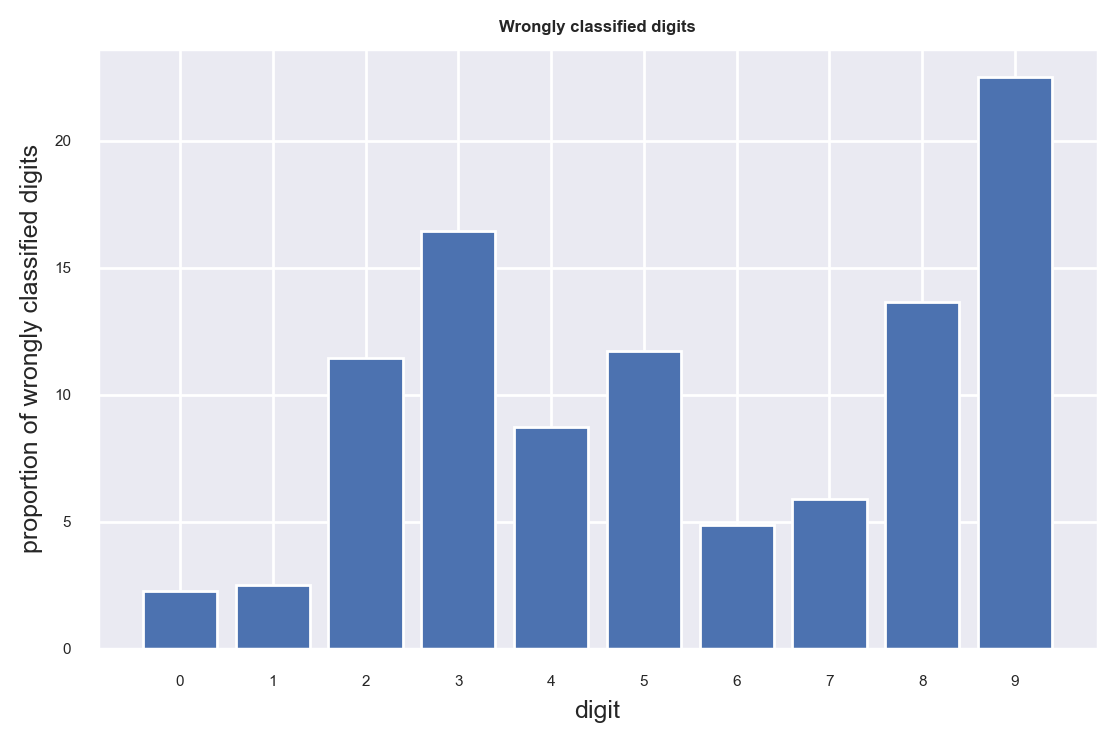

In [13]:
vis.barplot_false_digits()

## Results expanded code 

### Average images
The average digits are shown in the following:

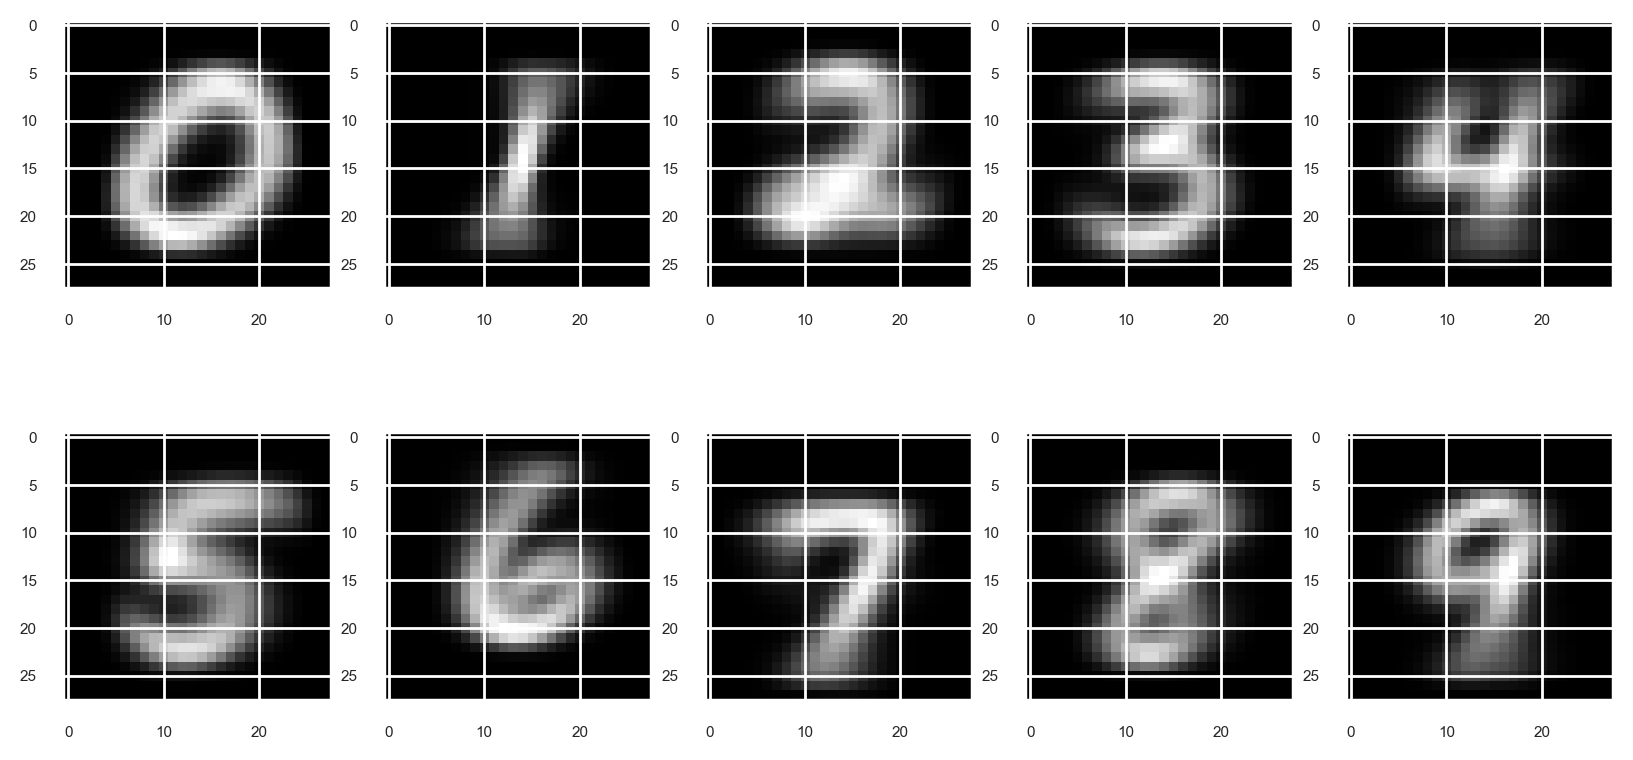

In [14]:
avg.digits(train_array)

The average images were used for recognizing the images from the test array. The (function  without pixel weight) achieved an accuracy of 66.85%. The (function with pixel weight) was able to lift this number up to 72.07%.

### PCA with singular value decomposition (SVD)
Implementing the PCA with SVD resulted in longer run times but the same accuracy.

### Self-written digit recognition
The first step of the self-written digit recognition is the reshaping of the inputed image to the right format (28x28) and the inversion of the intensities. The following diagram shows in what way this changes the image.

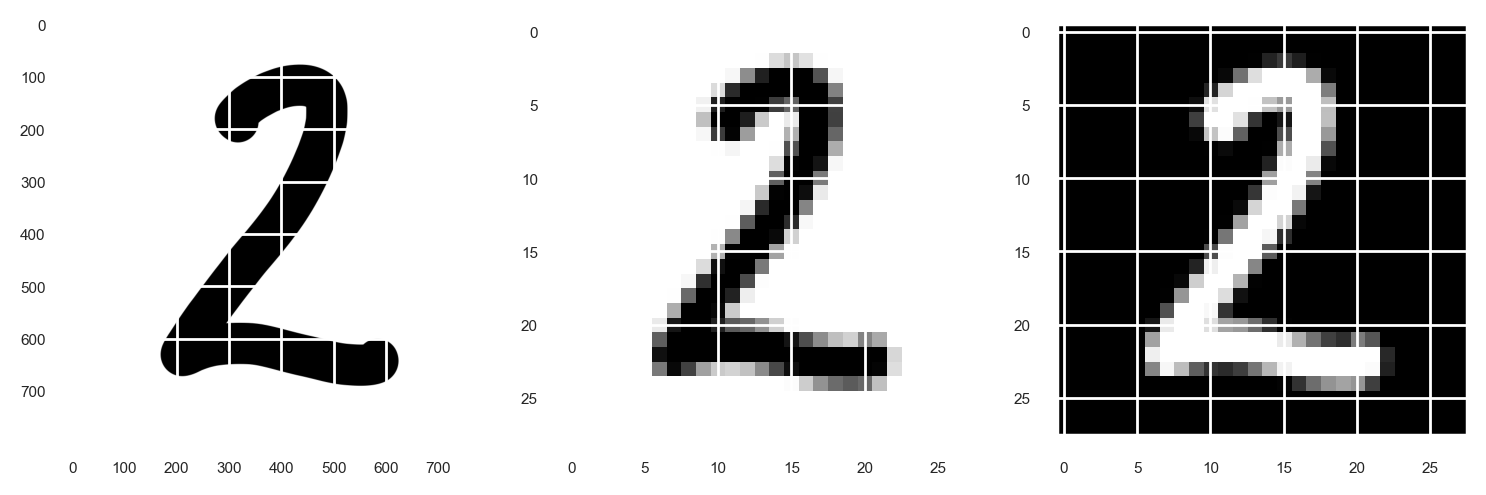

In [15]:
vis.self_written_digit()

# Discussion
All three steps for digit recognition using the KNN method were implemented successfully, them being data normalization, PCA and KNN. Their application enabled the creation of an algorithm that recognizes digits from the MNIST data set with an accuracy of 97,6%. 

After the z-transformation, the digits look differently and more uneven than before. This is due to the fact that for some pixels, the intensity values differ significantly from the mean intensity of that pixel. This means that the subtraction of the intensity mean still yields a high value, which is much higher than those of the ordinary pixels and thereby distorts the intensity scale to which the image is adjusted.

The implementation of the PCA in the second step was successful, which is evident because correlation between the PCs was minimized. Two-dimensional plots displaying the results of the PCA are already sufficient to identify some clustering. Specific numbers, such as 1, form particularly well visible clusters. 

Thirdly, the KNN algorithm was implemented. The biggest struggle concerning this step is run time. The fact that it does not build a model but compares data at the time of input makes it very simple but also requires a lot of computing power. The bigger the training data set is, the more inefficient the algorithm becomes. KNN does not actually learn, which means that the accuracy and flexibility are limited. This is further discussed when it comes to the recognition of self-written digits. However, the algorithm was sufficient for the size of the MNIST data set and allowed good predictions in relatively short run times.

Interestingly, the error rate is not the same for each digit. The digit nine has the highest error rate by far, accounting for more than 20% of the total errors. The digit three also has a relatively high error rate. The reason for this is probably that nine and three are both numbers that do not have very distinct features and can therefore be easily mistaken for other digits. Having identified this vulnerability in the code, it could be a target for further accuracy improvements. This could possibly be done by determining distinct features for these digits that could then be utilized to specifically balance out the weakness.

A second obstacle while implementing the KNN algorithm is the identification of the ideal k. Firstly, run times are long to determine the accuracy of the algorithm using different ks. Secondly, the first analysis showed that the accuracy values for k = 3,4 or 5 were very similar. Due to these minimal differences, making a decision based on accuracy alone would not be representative because these variations could simply be attributed to the random selection of the 10000 images used for the analysis. Generally, it is useful to choose an odd k to avoid ties. The way the algorithm currently works is that in case of a tie, k=1 is used to determine the label of the sample image. Hence, majority vote cannot be applied and this main characteristic of the algorithm is rendered useless, decreasing the algorithm's accuracy. This is why k=4 was not chosen. Of course, selecting an even k is possible, though it requires refinement of the algorithm of how to handle ties without losing accuracy. Out of the two options left, k=3 was chosen as the optimal k because it requires the smallest computing power.

In addition to choosing the right k, testing the accuracy of different PCs stretches out the run time even more. Based on accuracy values, using 29 PCs was determined as the optimal number. Using only 29 features to classify data points correctly is an immense improvement considering that they originally have 784 features. Interestingly, the total variance covered does not directly correlate with the accuracy of the predictions. The 29 PCs chosen cover only 70% of the variance, however, prediction accuracy is already very high. The remaining 30% of the variance do not seem to significantly improve accuracy. A possible explanation for this is that the error rate mainly stems from outliers which would be assigned to the wrong class even if all variance was covered.

In the expansion of the project, three different ideas were pursued.

The first idea was implement digit recognition based on average digits. For this, average digits were computed which were still visually recognizable. Using these digits, sample images from the training array could be identified with an accuracy of 66.85%. This was further improved by weighting certain pixels that covered a higher amount of variance, resulting in an accuracy of 72.07%. This is a very high accuracy taking into account how simple the algorithm is and how unspecific the parameters are that the classification is based on. Still, when compared with the accuracy achieved by using KNN, these results are insufficient. 

The second expansion was the implementation of the PCA with SVD instead of eigenvector decomposition. This resulted in the same accuracy but longer run times. This is probably due to the more complex matrix multiplication operation behind it.

The third idea was the application of the algorithm for recognition of self-written digits. These could be recognized with high accuracy. However, the code quickly reached its limitations when the numbers were not written in the American but the European way. This is logical, as the classification is based on the training array which consists of American numbers only. Again, this shows the limitations of KNN because it is restricted by its training data. This problem could be tackled by diversifying the training dataset through the addition of formerly misclassified digits. In doing so, the supervised algorithm would be able to recognize these in the future.

In summary, the task of recognizing digits using a KNN algorithm was fulfilled successfully. Many more applications of the code and MNIST data set are possible that are left for exploration in the future. For wider application, the algorithm could be trained to recognize multi-figure numbers. This would require another step prior to the KNN to recognize that there are several digits and then classifying these individually. Another option to be considered is tackling the problem of digit recognition by using new machine learning algorithms such as neural networks, as the KNN algorithm quickly reaches limitations. 

# Bibliography
1. Netzer, Y. et al. (2011)."Reading Digits in Natural Images with Unsupervised Feature Learning." Proceedings of the Workshop on Neural Information Processing Systems 
2. Baldominos, A., Saez, Y., Isasi, P. (2019) A Survey of Handwritten Character Recognition with MNIST and EMNIST
3. Govindaraju, V., Ianakiev, K. (2000) Potential improvement of classifier accuracy by using fuzzy measures
4. Le, L., Xie, Y., Raghavan, VV. (2021) KNN Loss and Deep KNN
5. Anowar F., Sadaoui S., Selim B. (2021) Conceptual and empirical comparison of dimensionality reduction algorithms (PCA, KPCA, LDA, MDS, SVD, LLE, ISOMAP, LE, ICA, t-SNE)